In [2]:
import numpy as np # import du package 'numpy' avec alias 'np' 
import pandas as pd # import du package 'pandas' avec alias 'pd'
import matplotlib.pyplot as mp
import re
from SRC.tools import show, inspect  # import des fonctions du module 'tools'
from IPython.core.interactiveshell import InteractiveShell as ish
from datetime import datetime

In [2]:
!pip install pypdf2 

In [3]:
!pip install folium

In [4]:
!pip install requests 

In [5]:
!pip install pdfreader 

In [14]:
!pip install unidecode

In [123]:
!pip install  PyMuPDF

In [68]:
!pip install selenium

In [132]:
!pip install beautifulsoup4

In [67]:
!pip install --upgrade urllib3 chardet

Requirement already up-to-date: urllib3 in c:\users\da costa\anaconda3\lib\site-packages (2.1.0)
Requirement already up-to-date: chardet in c:\users\da costa\anaconda3\lib\site-packages (5.2.0)


In [3]:
data_arret = pd.read_csv('https://opendata.bordeaux-metropole.fr/api/explore/v2.1/catalog/datasets/sv_arret_p/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B',sep = ';')
raw_data = pd.read_csv("https://opendata.bordeaux-metropole.fr/api/explore/v2.1/catalog/datasets/sv_horai_a/exports/csv?lang=fr&refine=source%3A%22SAEIV_TRAM%22&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B", sep = ";")
raw_data2 = pd.read_csv("https://opendata.bordeaux-metropole.fr/api/explore/v2.1/catalog/datasets/sv_vehic_p/exports/csv?lang=fr&timezone=Europe%2FParis&use_labels=true&delimiter=%3B",sep = ";")


In [4]:
data_realise = raw_data[raw_data['etat'] == 'REALISE']
data_realise = data_realise.drop(columns=['type', 'hor_estime','source','etat'])
data_annule = raw_data[raw_data.etat == 'ANNULE']
data_annule = data_annule.drop(columns = ['gid','hor_app','hor_estime','hor_real','source','etat','type','cdate','mdate','tempsarret'])
data_annule

,hor_theo,rs_sv_arret_p,rs_sv_cours_a
1129,2024-01-04T07:00:04+01:00,4051,743190
1130,2024-01-04T07:02:29+01:00,4053,743190
1131,2024-01-04T07:04:10+01:00,4055,743190
1132,2024-01-04T07:06:40+01:00,4057,743190
1133,2024-01-04T07:10:12+01:00,4059,743190
...,...,...,...
49970,2024-01-04T07:00:45+01:00,3957,743757
49971,2024-01-04T07:02:26+01:00,3960,743757
49972,2024-01-04T07:04:27+01:00,3971,743757
49973,2024-01-04T06:46:00+01:00,3813,743757


In [5]:
def convert_date(date_str):
    try:
        date_obj = datetime.fromisoformat(date_str)
        return date_obj.strftime("%d/%m/%Y")
    except ValueError:
        return date_str  
    
    
def extract_time(datetime_str):
    try:
        time_obj = datetime.fromisoformat(datetime_str)
        return time_obj.strftime("%H:%M:%S")
    except ValueError:
        return datetime_str


def extract_coord(df,name):
    df['latitude'] = pd.to_numeric(df[name].str.split(pat=",", expand=True)[0])
    df['longitude'] = pd.to_numeric(df[name].str.split(pat=",", expand=True)[1])

In [6]:
#data_realise['cdate'] = data_realise['cdate'].apply(convert_date)
#data_realise['mdate'] = data_realise['mdate'].apply(convert_date)
data_realise['hor_theo'] = data_realise['hor_theo'].apply(extract_time)
data_realise['hor_app'] = data_realise['hor_app'].apply(extract_time)
data_realise['hor_real'] = data_realise['hor_real'].apply(extract_time)
data_annule['hor_theo'] = data_annule['hor_theo'].apply(extract_time)
data_clear = raw_data2[raw_data2['vehicule'].isin(['TRAM_LONG', 'TRAM_COURT'])]
#data_clear['mdate'] = data_clear['mdate'].apply(convert_date)
#data_clear['cdate'] = data_clear['cdate'].apply(convert_date)
data_clear = data_clear.drop(columns=['bloque', 'neutralise','pmr','etat','geom_err','statut'])

In [7]:
extract_coord(data_arret,"Geo Point")

data_BUS = data_arret[data_arret.VEHICULE == 'BUS']
data_TRAM = data_arret[data_arret.VEHICULE == 'TRAM']

data_arrets_tot = data_arret[["GID","LIBELLE","latitude","longitude"]]
data_arrets_BUS = data_BUS[["GID","LIBELLE","latitude","longitude"]]
data_arrets_TRAM = data_TRAM[["GID","LIBELLE","latitude","longitude"]]

In [8]:
import requests

URLA = "https://ws.infotbm.com/uploads/network/line/files/64c7798421d80_TRAM%20A.pdf"
URLB = "https://ws.infotbm.com/uploads/network/line/files/64c779d9a1c99_TRAM%20B.pdf"
URLC = "https://ws.infotbm.com/uploads/network/line/files/64c77a6b34a05_TRAM%20C.pdf"
URLD = "https://ws.infotbm.com/uploads/network/line/files/64c77aaea258a_TRAM%20D.pdf"
title = ["LigneA.pdf","LigneB.pdf","LigneC.pdf","LigneD.pdf"]
URL = [URLA,URLB,URLC,URLD]
for j in range(len(URL)) :
    response = requests.get(URL[j])
    titre = title[j]
    open(titre, "wb").write(response.content)


C:\Users\da costa\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [9]:
import PyPDF2
from PyPDF2 import PdfReader

In [10]:
from unidecode import unidecode

Tram_A = PdfReader(open("LigneA.pdf", 'rb'))
Tram_B = PdfReader(open("LigneB.pdf", 'rb'))
Tram_C = PdfReader(open("LigneC.pdf", 'rb'))
Tram_D = PdfReader(open("LigneD.pdf", 'rb'))

def words(data):
    pdftext = ""
    pageObj = data.pages[0]
    pdftext += re.sub(r'[^a-zA-Z0-9]', '',unidecode(pageObj.extract_text().replace("\n","").replace(" ","")).lower())
    list_words = ''.join(caractere for caractere in pdftext if not caractere.isdigit())
    return(list_words)

list_words_A = words(Tram_A)
list_words_B = words(Tram_B)
list_words_C = words(Tram_C)
list_words_D = words(Tram_D)

In [11]:
def find_ligne(word):
        v = re.sub(r'[^a-zA-Z0-9]', '',unidecode(word.replace(" ","").replace("&","et").lower()))
        w = v.replace("de","")
        if re.search(v,list_words_A) or re.search(w,list_words_A):
            if re.search(v,list_words_B) or re.search(w,list_words_B) :
                return ('A/B')
            elif re.search(v,list_words_C) or re.search(w,list_words_C) :
                return ('A/C/D')
            else :
                return("A")
        elif re.search(v,list_words_B) or re.search(w,list_words_B):
            if re.search(v,list_words_C) or re.search(w,list_words_C) :
                return ('B/C')
            elif re.search(v,list_words_D) or re.search(w,list_words_D) :
                return ('B/D')
            else :
                return("B")
        elif re.search(v,list_words_C) or re.search(w,list_words_C):
            if re.search(v,list_words_D) or re.search(w,list_words_D):
                return ('C/D')
            else :
                return("C")
        elif re.search(v,list_words_D) or re.search(w,list_words_D):
            return("D")
        else : 
            return('0')

## On modifie le nom de certains arrets, étant donné qu'ils ont été modifiés mais pas sur notre base de données.
data_arrets_TRAM.loc[data_arrets_TRAM['LIBELLE'] == "Capc Musee D'Art Contemporain", 'LIBELLE'] = 'CAPC'
data_arrets_TRAM.loc[data_arrets_TRAM['LIBELLE'] == "Hotel De Ville Merignac", 'LIBELLE'] = 'Hotel De Ville De Merignac'
data_arrets_TRAM.loc[data_arrets_TRAM['LIBELLE'] == "Merignac Aeroport", 'LIBELLE'] = 'Aeroport'
data_arrets_TRAM.loc[data_arrets_TRAM['LIBELLE'] == "Place Ravezies - Le Bouscat", 'LIBELLE'] = 'Place Ravezies'
data_arrets_TRAM.loc[data_arrets_TRAM['LIBELLE'] == "Parc Des Expositions - Nouveau Stade", 'LIBELLE'] = 'BORDEAUX Parc des Expositions Stade Matmut Atlantique'

data_arrets_TRAM['Ligne'] = np.zeros(data_arrets_TRAM.shape[0])
for i in range(data_arrets_TRAM.shape[0]):
    data_arrets_TRAM.iloc[i,4] = find_ligne(data_arrets_TRAM.iloc[i,1])
#print(data_arrets_TRAM.LIBELLE[data_arrets_TRAM.Ligne == '0'])

data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3863, 'Ligne'] = 'B'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3864, 'Ligne'] = 'B'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3870, 'Ligne'] = 'B'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3869, 'Ligne'] = 'B'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3827, 'Ligne'] = 'A'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3826, 'Ligne'] = 'A'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3882, 'Ligne'] = 'C/D'
data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == 3945, 'Ligne'] = 'C/D'
data_arrets_TRAM.drop(data_arrets_TRAM[data_arrets_TRAM['LIBELLE'] == 'Quinconces Fleuve'].index, inplace=True)

C:\Users\da costa\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-11-20bfd3f759ee>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arrets_TRAM['Ligne'] = np.zeros(data_arrets_TRAM.shape[0])
C:\Users\da costa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [12]:
import folium as fl
colors_ligne = {'A' : '#A624BB','B' : '#F0202C','C' : '#F964DB','D' : '#E27FFA','A/B' : '#4315D3','A/C/D' : '#4315D3','B/C' : '#4315D3','B/D' : '#4315D3','C/D' : '#4315D3'}
center = (data_arrets_TRAM.latitude.mean(), data_arrets_TRAM.longitude.mean()) # calcul du centre de gravité
Arret_TRAM = fl.Map(location=center, tiles='OpenStreetMap', zoom_start=12) # création de la carte
for n in range(data_arrets_TRAM.shape[0]): # on itère sur les lignes correspondant au code d'équipement
    Gid,nom, lat, lon ,ligne = data_arrets_TRAM.iloc[n,[0,1,2,3,4]] # nom et coordonnées GPS de l'équipement à localiser
    #print(ligne)
    color = colors_ligne[ligne]
    icon = fl.Icon(icon='stop', color='black', icon_color=color) # icon pour la balise de localisation
    popup = fl.Popup(f"<b>{nom}</b><br><i>({Gid,ligne})</i>", min_width=200, max_width=300) # popup de la balise
    fl.Marker([lat, lon], popup=popup, icon=icon).add_to(Arret_TRAM) # ajout de la balise sur la carte
Arret_TRAM # affichage de la carte avec les balises de localisation des équipements

In [13]:
## Violet : A
## Rouge : B
## Rose : C
## Violet clair : D
## Bleu : plusieurs lignes en mêmes temps

In [14]:
data_clear = data_clear.rename(columns = {'terminus':'LIBELLE'})

data_clear.loc[data_clear['LIBELLE'] == "Blanquefort", 'LIBELLE'] = 'Gare De Blanquefort'
data_clear.loc[data_clear['LIBELLE'] == "Berge De Garonne", 'LIBELLE'] = 'Berges De La Garonne'
data_clear.loc[data_clear['LIBELLE'] == "La Gardette", 'LIBELLE'] = 'La Gardette - Bassens - Carbon-Blanc'
data_clear.loc[data_clear['LIBELLE'] == "Pyrenees", 'LIBELLE'] = 'Villenave Pyrénées'
data_clear.loc[data_clear['LIBELLE'] == "Dravemont", 'LIBELLE'] = 'Floirac Dravemont'
data_clear.loc[data_clear['LIBELLE'] == "France.Alouette", 'LIBELLE'] = 'France Alouette'
data_clear.loc[data_clear['LIBELLE'] == "Haillan-Rostand", 'LIBELLE'] = 'Le Haillan Rostand'
data_clear.loc[data_clear['LIBELLE'] == "Parc Des Expos", 'LIBELLE'] = 'BORDEAUX Parc des Expositions Stade Matmut Atlantique'

data_retard = pd.merge(data_clear,data_arrets_TRAM,on = 'LIBELLE',how='inner')
data_retard = data_retard.loc[:, ['retard','LIBELLE','Ligne']]
data_retard = data_retard.drop_duplicates(subset=['retard','LIBELLE'])
data_retard.Ligne[data_retard.Ligne == 'C/D'] = 'D'

In [15]:
# Calcul de la moyenne, du min et du max des retard par ligne 
data_retard['moyenne_retard'] = data_retard.groupby('Ligne')['retard'].transform('mean')
data_retard['retard_max'] = data_retard.groupby('Ligne')['retard'].transform('min')
data_retard['avance_max'] = data_retard.groupby('Ligne')['retard'].transform('max')
data_retard

,retard,LIBELLE,Ligne,moyenne_retard,retard_max,avance_max
0,-130,Cantinolle,D,-17.363636,-130,130
2,0,Cantinolle,D,-17.363636,-130,130
4,-17,Cantinolle,D,-17.363636,-130,130
6,130,Cantinolle,D,-17.363636,-130,130
8,110,Gare De Blanquefort,C,16.238095,-89,253
...,...,...,...,...,...,...
155,51,Villenave Pyrénées,C,16.238095,-89,253
157,-89,Villenave Pyrénées,C,16.238095,-89,253
159,42,Villenave Pyrénées,C,16.238095,-89,253
163,-44,Hippodrome,D,-17.363636,-130,130


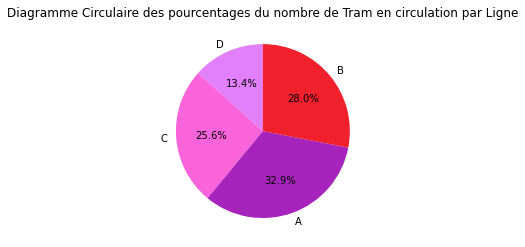

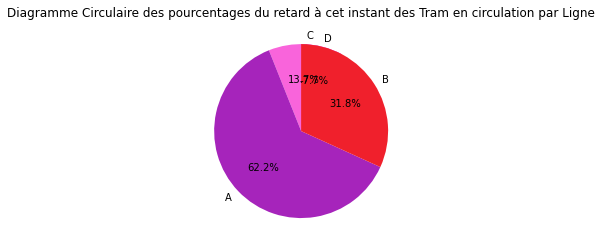

In [16]:
data_retard['Ratio_Ligne'] = data_retard.groupby('Ligne')['LIBELLE'].transform(lambda x: len(x) / len(data_retard))
data_retard['Sum_retard'] = data_retard.groupby('Ligne')['retard'].transform('sum')
data_retard_plot = data_retard.drop_duplicates(subset = ['Ligne']).copy()
data_retard_plot.loc[:, 'Ratio_retard'] = np.full(4, sum(data_retard_plot['Sum_retard']))
data_retard_plot.loc[:, 'Ratio_retard'] = data_retard_plot['Sum_retard'] / data_retard_plot['Ratio_retard']
data_retard_plot

couleurs = [colors_ligne[lignes] for lignes in data_retard_plot.Ligne]

mp.pie(data_retard_plot.Ratio_Ligne, labels=data_retard_plot.Ligne, autopct='%1.1f%%', startangle=90,colors = couleurs)
mp.title('Diagramme Circulaire des pourcentages du nombre de Tram en circulation par Ligne')
mp.show()
mp.pie(data_retard_plot.Ratio_retard, labels=data_retard_plot.Ligne, autopct='%1.1f%%', startangle=90,colors = couleurs)
mp.title('Diagramme Circulaire des pourcentages du retard à cet instant des Tram en circulation par Ligne')
mp.show()

In [57]:
def close(liste):
    for j in liste:
        if j > 0.35 :
            return (False)
    return (True)
def faible(liste):
    for j in liste :
        if j<0.2:
            return(True)
    return (False)
    
def commentaire_1():
    A = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'Ratio_Ligne'].values[0],2)
    B = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'B'),'Ratio_Ligne'].values[0],2)
    C = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'C'),'Ratio_Ligne'].values[0],2)
    D = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'D'),'Ratio_Ligne'].values[0],2)
    ligne = {A : 'A', B : 'B', C : 'C', D : 'D'}
    p = sorted([A,B,C,D])
    if close(p):
        if not faible(p):
            print(f"La répartition des trams sur les lignes est quasiment la même.")
        else :
            print(f"La répartition des trams sur les lignes est quasiment la même sauf la ligne {ligne[min(p)]} qui est moins représenté avec seulement {min(p)*100}% des trams du réseaus qui sont de cette ligne.")
            
    else :
        print(f"Les lignes ne sont pas en repsésenté équitablement en effet la ligne {ligne[max(p)]} est plus présente que les autres avec {max(p)*100}% des trams du réseaux TBM qui sont de cette ligne")
commentaire_1()

La répartition des trams sur les lignes est quasiment la même sauf la ligne D qui est moins représenté avec seulement 13.0% des trams du réseaus qui sont de cette ligne.


In [58]:
def commentaire_2():
    A = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'Ratio_retard'].values[0],2)
    ra = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'moyenne_retard'].values[0])
    B = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'B'),'Ratio_retard'].values[0],2)
    rb = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'moyenne_retard'].values[0])
    C = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'C'),'Ratio_retard'].values[0],2)
    rc = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'moyenne_retard'].values[0])
    D = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'D'),'Ratio_retard'].values[0],2)
    rd = round(data_retard_plot.loc[(data_retard_plot.Ligne == 'A'),'moyenne_retard'].values[0])
    ligne = {A : 'A', B : 'B', C : 'C', D : 'D'}
    retard = {A : ra, B : rb, C : rc, D : rd}
    po = [A,B,C,D]
    ne = []
    for v in range(len(po)) :
        if po[v]<0:
            ne.append(po.pop(v))
    if len(ne) == 0:
        print(f"On constate que toutes les lignes sont en retard et que la ligne avec le plus gros retard est la ligne {ligne[max(po)]}")
    if len(ne) == 1 :
        if not close(po):
            print(f"On constate que la ligne {ligne[ne[0]]} est en avance et que les trois autres sont en retard. De plus la ligne {ligne[max(po)]} est la plus en retard avec plus de {max(po)*100}% des retards du réseau TBM soit un retard moyen de {retard[max(po)]}s")
        else :
            print(f"On constate que la ligne {ligne[ne[0]]} est en avance et que les trois autres sont en retard. De plus les lignes ont quasiment le même retard")
    if len(ne) == 2 :
        if not close(po):
            print(f"On constate que les lignes {ligne[ne[0]]} et {ligne[ne[1]]} sont en avance et que les deux autres sont en retard. De plus la ligne {ligne[max(po)]} est la plus en retard avec plus de {max(po)*100}% des retards du réseau TBM soit un retard moyen de {retard[max(po)]}s")
        else :
            print(f"On constate que les lignes {ligne[ne[0]]} et {ligne[ne[1]]} sont en avance et que les deux autres sont en retard. De plus les lignes ont quasiment le même retard")
    if len(ne) == 3 :
        print(f"On constate que trois lignes sont en avance et que la seule ligne en retard est la ligne {ligne[po[0]]}")
    if len(ne) == 4 :
        print(f"Toutes les lignes sont en avance et la ligne avec la plus grosse avance est la ligne {ligne[max(ne)]}")
commentaire_2()

On constate que la ligne D est en avance et que les trois autres sont en retard. De plus la ligne A est la plus en retard avec plus de 62.0% des retards du réseau TBM soit un retard moyen de 57.0s


In [17]:
if 'gid' in list(data_realise) :
    data_realise = data_realise.drop(columns = ['gid','cdate','mdate'])
data_realise = data_realise.rename(columns = {'rs_sv_arret_p':'GID'})
data_realise
data_TRAM = pd.merge(data_arrets_TRAM,data_realise,on = 'GID',how='inner')

In [18]:
data_TRAM = data_TRAM.rename(columns = {'rs_sv_cours_a':'Numero_TRAM'})

In [19]:
data_TRAM = data_TRAM.sort_values(by=['Numero_TRAM', 'hor_real'])

# Grace aux info des autres arrets on peut savoir savoir si un arret est deservi par un tram de la ligne A ou C ou D
def correct_ligne(liste):
    if 'A' in list(liste) :
        return ('A')
    elif 'B' in list(liste) :
        return('B')
    elif 'C' in list(liste) :
        return('C')
    elif 'D' in list(liste) :
        return('D')
    else : 
        return('0')
data_TRAM['Ligne'] = data_TRAM.groupby('Numero_TRAM')['Ligne'].transform(lambda x: correct_ligne(x))

In [20]:
def correct_ligne_1(serie1,serie2):
    liste1 = list(serie1)
    liste2 = list(serie2)
    ligne = []
    for i in range(len(liste1)):
        if liste1[i] == 'C/D' or liste1[i] == 'A/C/D':
            ligne.append(correct_ligne(data_annul.Ligne[data_annul.Numero_TRAM == liste2[i]]))
        else : 
            ligne.append(liste1[i])
    return(ligne)

In [21]:
# Ici on va chercher à déterminer le ratio de chaque ligne sur les arrets annulés
data_annule = data_annule.rename(columns = {'rs_sv_arret_p':'GID'})
data_annule = data_annule.rename(columns = {'rs_sv_cours_a':'Numero_TRAM'})
data_TRAM_temp = data_TRAM.drop(columns = ['latitude','longitude','hor_theo','hor_real','hor_app','tempsarret'])
data_TRAM_temp
data_annul = pd.merge(data_arrets_TRAM, data_annule, on = ['GID'], how='outer')

data_annul = data_annul.dropna(subset = ['Ligne'])
data_annul['Ligne'] = correct_ligne_1(data_annul.Ligne,data_annul.Numero_TRAM)
data_annul = data_annul.drop(data_annul[data_annul.Ligne == '0'].index)
data_annul['Ratio'] = data_annul.groupby('Ligne')['latitude'].transform(lambda x: len(x) / len(data_annul))
data_annul

,GID,LIBELLE,latitude,longitude,Ligne,hor_theo,Numero_TRAM,Ratio
0,3853,Barriere Saint-Genes,44.820777,-0.583136,B,13:52:28,743910.0,0.118676
1,3934,La Cite Du Vin,44.860739,-0.553157,B,14:15:23,743910.0,0.118676
2,3951,Belcier,44.822556,-0.552135,C,07:56:34,743184.0,0.433479
3,3951,Belcier,44.822556,-0.552135,C,09:52:46,743500.0,0.433479
4,3951,Belcier,44.822556,-0.552135,C,11:46:49,743078.0,0.433479
...,...,...,...,...,...,...,...,...
1597,4033,Fondaudege - Museum,44.846770,-0.580276,D,06:43:27,743190.0,0.198626
1598,4033,Fondaudege - Museum,44.846770,-0.580276,D,06:18:50,743397.0,0.198626
1599,4033,Fondaudege - Museum,44.846770,-0.580276,D,06:03:30,742561.0,0.198626
1600,4062,Cantinolle,44.891670,-0.667276,D,NaN,NaN,0.198626


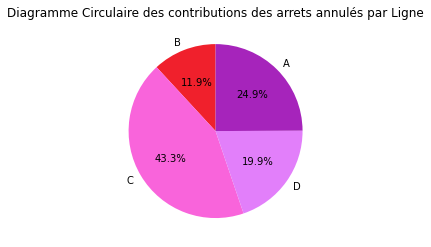

In [22]:
data_annul_plot = data_annul.drop_duplicates(subset = ['Ligne'])
couleurs = [colors_ligne[lignes] for lignes in data_annul_plot.Ligne]

mp.pie(data_annul_plot.Ratio, labels=data_annul_plot.Ligne, autopct='%1.1f%%', startangle=90,colors = couleurs)
mp.title('Diagramme Circulaire des contributions des arrets annulés par Ligne')
mp.show()

In [59]:
data_annul_plot

,GID,LIBELLE,latitude,longitude,Ligne,hor_theo,Numero_TRAM,Ratio
0,3853,Barriere Saint-Genes,44.820777,-0.583136,B,13:52:28,743910.0,0.118676
2,3951,Belcier,44.822556,-0.552135,C,07:56:34,743184.0,0.433479
7,3951,Belcier,44.822556,-0.552135,D,12:58:49,742574.0,0.198626
38,3960,Carriet,44.882198,-0.523839,A,11:58:01,743900.0,0.249219


In [63]:
def commentaire_3():
    A = round(data_annul_plot.loc[(data_annul_plot.Ligne == 'A'),'Ratio'].values[0],2)
    B = round(data_annul_plot.loc[(data_annul_plot.Ligne == 'B'),'Ratio'].values[0],2)
    C = round(data_annul_plot.loc[(data_annul_plot.Ligne == 'C'),'Ratio'].values[0],2)
    D = round(data_annul_plot.loc[(data_annul_plot.Ligne == 'D'),'Ratio'].values[0],2)
    ligne = {A : 'A', B : 'B', C : 'C', D : 'D'}
    p = sorted([A,B,C,D])
    if close(p):
        if not faible(p):
            print(f"Le retard des trams est réparti de manière uniforme entre les lignes.")
        else :
            print(f"Le retard des trams est réparti de manière uniforme entre les lignes sauf sur la ligne {ligne[min(p)]} qui est moins en retard")
            
    else :
        print(f"Le retard des trams n'est pas réparti de manière uniforme entre les lignes en effet la ligne {ligne[max(p)]} est plus en retard que les autres avec {max(p)*100}% du retard de tout le réseaux sur cette ligne")
commentaire_3()

Le retard des trams n'est pas réparti de manière uniforme entre les lignes en effet la ligne C est plus en retard que les autres avec 43.0% du retard de tout le réseaux sur cette ligne


In [23]:
# On donne un niveau pour chaque temp d'arret
data_TRAM['mean_temps_arrets'] = data_TRAM.groupby('GID')['tempsarret'].transform('mean')
data_TRAM['mean_temps_arrets_ligne'] = data_TRAM.groupby('Ligne')['tempsarret'].transform('mean')

def niveau_arret(serie):
    liste =  list(serie)
    value = liste[0]
    if value <= 20:
        return('Faible')
    elif value <= 30:
        return('Moyen')
    elif value <= 60:
        return('Elevé')
    else :
        return('Trés Elevé')
    
data_TRAM['Niveau_temp_arret'] = data_TRAM.groupby('GID')['mean_temps_arrets'].transform(lambda x: niveau_arret(x))
#data_TRAM.mean_temps_arrets_ligne[data_TRAM.Ligne == 'A'] ## 36.75s
#data_TRAM.mean_temps_arrets_ligne[data_TRAM.Ligne == 'B'] ## 37.85s
#data_TRAM.mean_temps_arrets_ligne[data_TRAM.Ligne == 'C'] ## 37.64s
#data_TRAM.mean_temps_arrets_ligne[data_TRAM.Ligne == 'D'] ## 48.36s

# On transforme le temps en seconde

def to_seconde(serie):
    if isinstance(serie, pd.Series):
        liste = list(serie)

    temp = []
    for j in liste:
        time = j.split(':')
        temp.append(3600*float(time[0]) + 60*float(time[1]) + float(time[2]))
    return (temp)

# On calcule le temps entre l'horaire réel et l'horaire théorique 

def diff(serie1,serie2):
    liste1 = to_seconde(serie1)
    liste2 = to_seconde(serie2)
    diffe = [liste1[i]-liste2[i] for i in range(len(liste1))]
    return(diffe)

data_TRAM['Retard/Avance'] = diff(data_TRAM['hor_real'],data_TRAM['hor_theo'])
data_TRAM['mean_retard_arrets'] = data_TRAM.groupby('GID')['Retard/Avance'].transform('mean')
data_TRAM['mean_retard_arrets_ligne'] = data_TRAM.groupby('Ligne')['Retard/Avance'].transform('mean')

# Même principe que le temps d'arrets on met des niveaux

def niveau_retard(serie):
    liste =  list(serie)
    value = liste[0]
    if value <= 80:
        return('Ponctuel')
    else :
        return('En Retard')
    
data_TRAM['Niveau_retard_arret'] = data_TRAM.groupby('GID')['mean_retard_arrets'].transform(lambda x: niveau_retard(x))
data_TRAM = data_TRAM.drop(data_TRAM[data_TRAM.Ligne == '0'].index)
data_TRAM_ss_doublons = data_TRAM.drop_duplicates(subset='GID')
data_TRAM_ss_doublons

,GID,LIBELLE,latitude,longitude,Ligne,hor_theo,hor_app,hor_real,Numero_TRAM,tempsarret,mean_temps_arrets,mean_temps_arrets_ligne,Niveau_temp_arret,Retard/Avance,mean_retard_arrets,mean_retard_arrets_ligne,Niveau_retard_arret
12651,3974,Berges De La Garonne,44.885584,-0.541530,B,09:26:14,09:26:14,09:23:16,742362,220.0,147.939759,38.325413,Trés Elevé,-178.0,-113.963855,26.720015,Ponctuel
767,3970,Claveau,44.877853,-0.543855,B,09:28:54,09:28:54,09:29:17,742362,19.0,118.629630,38.325413,Trés Elevé,23.0,-98.469136,26.720015,Ponctuel
13133,3968,Brandenburg,44.874468,-0.545703,B,09:30:18,09:30:18,09:30:36,742362,24.0,25.162500,38.325413,Moyen,18.0,-6.375000,26.720015,Ponctuel
8428,3966,New York,44.871095,-0.547329,B,09:31:43,09:31:43,09:32:02,742362,23.0,22.300000,38.325413,Moyen,19.0,-1.737500,26.720015,Ponctuel
3689,3964,Rue Achard,44.866596,-0.548721,B,09:33:30,09:33:30,09:33:53,742362,23.0,26.587500,38.325413,Moyen,23.0,-4.137500,26.720015,Ponctuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,4004,Lycee Vaclav Havel,44.786580,-0.566252,C,10:45:12,10:45:11,10:45:16,742473,6.0,15.953488,39.873953,Faible,4.0,94.186047,35.574055,En Retard
10840,4029,Villenave Centre-Pont De La Maye,44.782028,-0.566220,C,10:47:07,10:47:06,10:46:56,742473,0.0,15.651163,39.873953,Faible,-11.0,76.883721,35.574055,Ponctuel
18925,4031,Villenave Pyrénées,44.773964,-0.564810,C,11:25:23,11:25:23,11:30:09,742914,0.0,0.000000,39.873953,Faible,286.0,286.000000,35.574055,En Retard
10821,4017,BORDEAUX Parc des Expositions Stade Matmut Atl...,44.893296,-0.565972,C,12:21:27,12:21:27,12:22:53,743078,0.0,0.000000,39.873953,Faible,86.0,43.000000,35.574055,Ponctuel


In [24]:
def tranche_horaire(serie):
    liste = list(serie)
    th = []
    for j in liste :
        time = j.split(':')
        test = float(time[0])
        if test<3 :
            th.eppend('00h - 03h')
        elif test<6 :
            th.append('03h - 06h')
        elif test<6 :
            th.append('03h - 06h')
        elif test<9 :
            th.append('06h - 09h')
        elif test<12 :
            th.append('09h - 12h')
        elif test<15 :
            th.append('12h - 15h')
        elif test<18 :
            th.append('15h - 18h')
        elif test<21 :
            th.append('18h - 21h')
        else : 
            th.append('21h - 00h')
    return(th)

data_TRAM['mean_by_tram'] = data_TRAM.groupby(['Numero_TRAM'])['Retard/Avance'].transform('mean')
data_TRAM['Tranche_horaire'] = tranche_horaire(data_TRAM['hor_real'])
data_TRAM_1 = data_TRAM.drop_duplicates(subset = ['Tranche_horaire','Numero_TRAM']).copy()
data_TRAM_1['Sum_TH'] = abs(data_TRAM_1.groupby(['Tranche_horaire','Ligne'])['mean_by_tram'].transform('sum'))/60
data_TRAM_plot_1 = data_TRAM_1.drop_duplicates(subset = ['Ligne','Tranche_horaire']).copy()
data_TRAM_1

,GID,LIBELLE,latitude,longitude,Ligne,hor_theo,hor_app,hor_real,Numero_TRAM,tempsarret,mean_temps_arrets,mean_temps_arrets_ligne,Niveau_temp_arret,Retard/Avance,mean_retard_arrets,mean_retard_arrets_ligne,Niveau_retard_arret,mean_by_tram,Tranche_horaire,Sum_TH
12651,3974,Berges De La Garonne,44.885584,-0.541530,B,09:26:14,09:26:14,09:23:16,742362,220.0,147.939759,38.325413,Trés Elevé,-178.0,-113.963855,26.720015,Ponctuel,-9.718750,09h - 12h,2.348893
12035,3902,Floirac Dravemont,44.845904,-0.510404,A,11:31:22,11:32:55,11:27:18,742363,369.0,202.350000,36.341149,Trés Elevé,-244.0,-99.562500,86.141149,Ponctuel,173.615385,09h - 12h,173.469343
5542,3820,Porte De Bourgogne,44.837254,-0.566288,A,11:56:44,11:58:17,12:00:04,742363,34.0,40.219780,36.341149,Elevé,200.0,58.054945,86.141149,Ponctuel,173.615385,12h - 15h,34.247169
18751,4061,Cantinolle,44.892042,-0.667468,D,10:12:18,10:12:18,09:58:27,742367,980.0,371.682540,47.427197,Trés Elevé,-831.0,-318.126984,3.007531,Ponctuel,13.583333,09h - 12h,39.385895
18825,4026,Gare De Blanquefort,44.916801,-0.623561,C,07:26:22,07:25:00,07:23:46,742375,280.0,200.914634,39.873953,Trés Elevé,-156.0,-81.853659,35.574055,Ponctuel,-16.500000,06h - 09h,54.126435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18591,3980,BORDEAUX Parc des Expositions Stade Matmut Atl...,44.893268,-0.565822,C,06:39:00,06:37:00,06:30:16,744042,392.0,363.575342,39.873953,Trés Elevé,-524.0,-304.273973,35.574055,Ponctuel,-135.700000,06h - 09h,54.126435
18592,3980,BORDEAUX Parc des Expositions Stade Matmut Atl...,44.893268,-0.565822,C,07:00:00,06:48:44,06:38:57,744043,640.0,363.575342,39.873953,Trés Elevé,-1263.0,-304.273973,35.574055,Ponctuel,-625.800000,06h - 09h,54.126435
12531,3933,La Cite Du Vin,44.860732,-0.553236,B,05:54:00,05:54:59,05:54:04,744044,60.0,63.266667,38.325413,Trés Elevé,4.0,16.822222,26.720015,Ponctuel,171.066667,03h - 06h,83.966503
608,3925,CAPC,44.849080,-0.570490,B,05:59:40,06:01:38,06:01:04,744044,27.0,31.561798,38.325413,Elevé,84.0,35.000000,26.720015,Ponctuel,171.066667,06h - 09h,45.709657


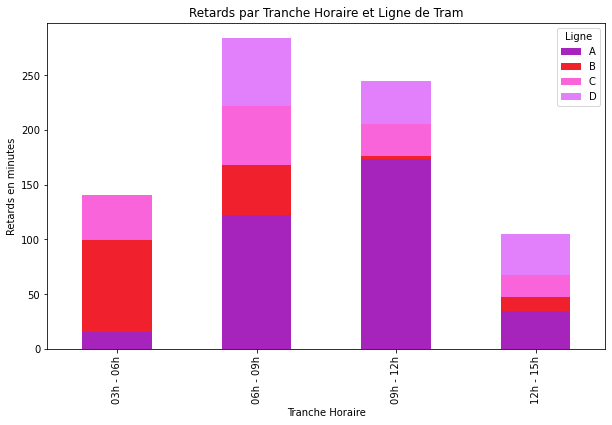

In [25]:
from matplotlib.colors import ListedColormap

couleurs_perso = ['#A624BB','#F0202C','#F964DB','#E27FFA']
color_map =  ListedColormap(couleurs_perso)
data_TRAM_plot_1_pivot = data_TRAM_plot_1.pivot_table(index='Tranche_horaire', columns='Ligne', values='Sum_TH', aggfunc=np.sum)
data_TRAM_plot_1_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=color_map)


mp.title('Retards par Tranche Horaire et Ligne de Tram')
mp.xlabel('Tranche Horaire')
mp.ylabel('Retards en minutes')
mp.legend(title='Ligne')

In [95]:
def commentaire_3():
    time =  datetime.now().strftime("%H:%M:%S")
    heure = float(time.split(':')[0])
    th = ['03h - 06h','06h - 09h','09h - 12h','12h - 15h','15h - 18h','18h - 21h','21h - 00h']
    h = []
    ligne = []
    for j in th :
        liste = list(data_TRAM_plot_1.loc[(data_TRAM_plot_1.Tranche_horaire == j),'Sum_TH'])
        if len(liste) !=0:
            h.append(round(max(liste)))
            ligne.append(data_TRAM_plot_1.loc[(data_TRAM_plot_1.Sum_TH == max(liste)),'Ligne'].values[0])
    for i in range(len(h)):
        print(f"Sur la tranche horaire {th[i]} la ligne avec le plus de retard est la ligne {ligne[i]} avec {h[i]}min de retard cumulées sur l'ensemble des arrêts" )
commentaire_3()

Sur la tranche horaire 03h - 06h la ligne avec le plus de retard est la ligne B avec 84min de retard cumulées sur l'ensemble des arrêts
Sur la tranche horaire 06h - 09h la ligne avec le plus de retard est la ligne A avec 122min de retard cumulées sur l'ensemble des arrêts
Sur la tranche horaire 09h - 12h la ligne avec le plus de retard est la ligne A avec 173min de retard cumulées sur l'ensemble des arrêts
Sur la tranche horaire 12h - 15h la ligne avec le plus de retard est la ligne D avec 37min de retard cumulées sur l'ensemble des arrêts


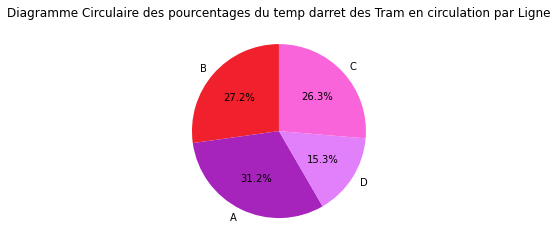

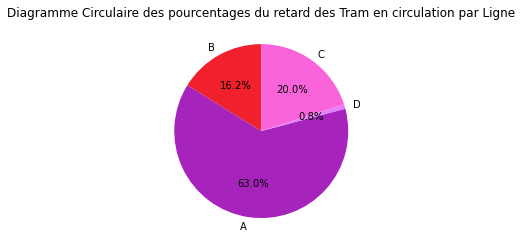

In [26]:
data_TRAM['Sum_temp_arret'] = data_TRAM.groupby('Ligne')['tempsarret'].transform('sum')
data_TRAM['Sum_retard'] = data_TRAM.groupby('Ligne')['Retard/Avance'].transform('sum')
data_TRAM_plot = data_TRAM.drop_duplicates(subset = ['Ligne']).copy()

data_TRAM_plot['Ratio_temp_arret'] = sum(data_TRAM_plot['Sum_temp_arret'])
data_TRAM_plot['Ratio_retard'] = sum(data_TRAM_plot['Sum_retard'])

data_TRAM_plot['Ratio_temp_arret'] = data_TRAM_plot['Sum_temp_arret']/data_TRAM_plot['Ratio_temp_arret']
data_TRAM_plot['Ratio_retard'] = data_TRAM_plot['Sum_retard']/data_TRAM_plot['Ratio_retard']

couleurs = [colors_ligne[lignes] for lignes in data_TRAM_plot.Ligne]

mp.pie(data_TRAM_plot.Ratio_temp_arret, labels=data_TRAM_plot.Ligne, autopct='%1.1f%%', startangle=90,colors= couleurs)
mp.title('Diagramme Circulaire des pourcentages du temp darret des Tram en circulation par Ligne')
mp.show()
mp.pie(data_TRAM_plot.Ratio_retard, labels=data_TRAM_plot.Ligne, autopct='%1.1f%%', startangle=90,colors= couleurs)
mp.title('Diagramme Circulaire des pourcentages du retard des Tram en circulation par Ligne')
mp.show()

In [97]:
def commentaire_4():
    A = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'A'),'Ratio_temp_arret'].values[0],2)
    B = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'B'),'Ratio_temp_arret'].values[0],2)
    C = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'C'),'Ratio_temp_arret'].values[0],2)
    D = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'D'),'Ratio_temp_arret'].values[0],2)
    ligne = {A : 'A', B : 'B', C : 'C', D : 'D'}
    p = sorted([A,B,C,D])
    if close(p):
        if not faible(p):
            print(f"Le temp d'arrêt des trams est réparti de manière uniforme entre les lignes.")
        else :
            print(f"Le temp d'arrêt des trams est réparti de manière uniforme entre les lignes sauf sur la ligne {ligne[min(p)]} qui reste moins longtemps en station.")
            
    else :
        print(f"Le temp d'arrêt en station des trams n'est pas réparti de manière uniforme entre les lignes en effet la ligne {ligne[max(p)]} reste plus longtemps en station que les autres.")
commentaire_4()

Le temp d'arrêt des trams est réparti de manière uniforme entre les lignes sauf sur la ligne D qui reste moins longtemps en station


In [98]:
def commentaire_5():
    A = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'A'),'Ratio_retard'].values[0],2)
    B = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'B'),'Ratio_retard'].values[0],2)
    C = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'C'),'Ratio_retard'].values[0],2)
    D = round(data_TRAM_plot.loc[(data_TRAM_plot.Ligne == 'D'),'Ratio_retard'].values[0],2)
    ligne = {A : 'A', B : 'B', C : 'C', D : 'D'}
    p = sorted([A,B,C,D])
    if close(p):
        if not faible(p):
            print(f"Le retard des trams est réparti de manière uniforme entre les lignes.")
        else :
            print(f"Le retard des trams est réparti de manière uniforme entre les lignes sauf sur la ligne {ligne[min(p)]} qui reste moins en retard.")
            
    else :
        print(f"Le retard des trams n'est pas réparti de manière uniforme entre les lignes en effet la ligne {ligne[max(p)]} est plus en retard que les autres avec plus de {max(p)*100}% du retard du réseau.")
commentaire_5()

Le retard des trams n'est pas réparti de manière uniforme entre les lignes en effet la ligne A est plus en retard que les autres avec plus de 63.0% du retard du réseau.


In [27]:
colors = {'Faible' : '#15D33A','Moyen' : '#F0F31D','Elevé' : '#F3970A','Trés Elevé' : '#F3230A'}
center = (data_TRAM.latitude.mean(), data_TRAM.longitude.mean()) # calcul du centre de gravité
Arret_TRAM_Niveau = fl.Map(location=center, tiles='OpenStreetMap', zoom_start=12) # création de la carte
for n in range(data_TRAM_ss_doublons.shape[0]): # on itère sur les lignes correspondant au code d'équipement
    Gid,nom, lat, lon, niveau = data_TRAM_ss_doublons.iloc[n,[0,1,2,3,12]] # nom et coordonnées GPS de l'équipement à localiser
    #print(ligne)
    color = colors[niveau]
    icon = fl.Icon(icon='stop', color='black', icon_color=color) # icon pour la balise de localisation
    popup = fl.Popup(f"<b>{nom}</b><br><i>({Gid})</i>", min_width=200, max_width=300) # popup de la balise
    fl.Marker([lat, lon], popup=popup, icon=icon).add_to(Arret_TRAM_Niveau) # ajout de la balise sur la carte
Arret_TRAM_Niveau # affichage de la carte avec les balises des arrets de tram avec leur couleur associé à leur niveau 

In [28]:
colors = {'Ponctuel' : '#0AF31F','En Retard' : '#F3150A'}
center = (data_TRAM.latitude.mean(), data_TRAM.longitude.mean()) # calcul du centre de gravité
Retard_TRAM_Niveau = fl.Map(location=center, tiles='OpenStreetMap', zoom_start=12) # création de la carte
for n in range(data_TRAM_ss_doublons.shape[0]): # on itère sur les lignes correspondant au code d'équipement
    Gid,nom, lat, lon,niveau = data_TRAM_ss_doublons.iloc[n,[0,1,2,3,16]] # nom et coordonnées GPS de l'équipement à localiser
    #print(ligne)
    color = colors[niveau]
    icon = fl.Icon(icon='stop', color='black', icon_color=color) # icon pour la balise de localisation
    popup = fl.Popup(f"<b>{nom}</b><br><i>({Gid})</i>", min_width=200, max_width=300) # popup de la balise
    fl.Marker([lat, lon], popup=popup, icon=icon).add_to(Retard_TRAM_Niveau) # ajout de la balise sur la carte
Retard_TRAM_Niveau # affichage de la carte avec les balises sur le retard 

In [105]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
from time import sleep
import time

In [118]:
def get_time_distance(GID_1,GID_2,index = 0):
    import time
# On ouvre la page de l'URL
    driver = webdriver.Chrome()
    driver.get("https://www.coordonnees-gps.fr/itineraire")
# On ferme les cookies
    button_cookies = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Refuser"]')))
    action = ActionChains(driver)
    action.move_to_element(button_cookies).click().perform()
    #cookie_button = driver.find_element(By.XPATH, '//button[text()="Refuser"]')
    #driver.execute_script("arguments[0].click();", cookie_button)
# Voiture : index = 0
# Vélo : index = 1
# Transport en commum : index = 2
# A pied : index = 3
    select = Select(driver.find_element(By.ID, 'travelMode'))
    select.select_by_index(index)
# On recupere les éléments latitude et longitude dans la page pour les remplir avec nos valeurs. 
    input_element_lat = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'latitude')))
    input_element_lon = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'longitude')))
# On recupere les valeur de longitude et de latitude pour les deux GID
    lat1 = str(data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == GID_1, 'latitude'].values[0])
    lat2 = str(data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == GID_2, 'latitude'].values[0])
    lon1 = str(data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == GID_1, 'longitude'].values[0])
    lon2 = str(data_arrets_TRAM.loc[data_arrets_TRAM['GID'] == GID_2, 'longitude'].values[0])
    
    
# On donne les valeurs dans les éléments correspondants   
    input_element_lat.send_keys(lat1)
    input_element_lon.send_keys(lon1)
    

    time.sleep(5)
    footer = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Voir sur la carte"]')))
    delta_y = footer.rect['y']
    ActionChains(driver)\
        .scroll_by_amount(0, -15)\
        .perform()

    
    time.sleep(5)

# On clique sur les boutons qu'il nous faut 
    button_voir_sur_la_carte = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Voir sur la carte"]')))
    action = ActionChains(driver)
    action.move_to_element(button_voir_sur_la_carte).click().perform()

    button_départ = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Choisir comme point de départ"]')))
    action = ActionChains(driver)
    action.move_to_element(button_départ).click().perform()

# On clean les éléments pour mettre nos nouvelles valeurs
    input_element_lat.clear()
    input_element_lat.send_keys(lat2)
    input_element_lon.clear()
    input_element_lon.send_keys(lon2)

    button_voir_sur_la_carte = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Voir sur la carte"]')))
    action = ActionChains(driver)
    action.move_to_element(button_voir_sur_la_carte).click().perform()

    button_destination = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[text()="Choisir comme destination"]')))
    action = ActionChains(driver)
    action.move_to_element(button_destination).click().perform()
    
    button_element = driver.find_element(By.CLASS_NAME, 'btn-success')
    driver.execute_script("arguments[0].click();", button_element)
    
    time = []
    
    while len(time) == 0:
        wait = WebDriverWait(driver, 10)
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*')))

        page = driver.page_source.encode('utf-8')
  
        file_ = open('result.html', 'wb')
        file_.write(page)
        file_.close()
    
        with open('result.html', 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            soup = BeautifulSoup(contenu, 'html.parser')

            # Extraire le texte du HTML
            texte = soup.get_text()
        text = texte.split(" ")
        for i in range(len(text)):
            if text[i] == 'Environ' :
                word = (text[i-2])
                time = [text[j] for j in range(i+1,i+5)]
       
    test = time[2].split(".")
    if test[0] == '1':
        del time[-1]
        del time[-1]
    times = 0
    for j in range(len(time)) :
        if time[j] == 'heure' :
            times = float(time[j-1])*60
        elif time[j] == 'min' or time[j] == 'minutes':
            times += float(time[j-1])
    distance = float(''.join(caractere for caractere in word if caractere.isdigit() or caractere == ',').replace(',','.'))
    return (distance,times)
    
#print(get_time_distance(4904,4062,1))


In [108]:
def GID_LIBELLE (serie):
    liste = list(serie)
    return(list(set(liste))[0])


def temps_arrets(name1,name2):
    GID_1 = GID_LIBELLE(data_TRAM.GID[data_TRAM.LIBELLE == name1])
    GID_2 = GID_LIBELLE(data_TRAM.GID[data_TRAM.LIBELLE == name2])
    times = []
    times.append(get_time_distance(GID_1,GID_2,index = 3)[1])
    times.append(get_time_distance(GID_1,GID_2,index = 1)[1])
    times.append(get_time_distance(GID_1,GID_2,index = 0)[1])
    num_tram_1 = list(data_TRAM.Numero_TRAM[data_TRAM.LIBELLE == name1])
    num_tram_2 = list(data_TRAM.Numero_TRAM[data_TRAM.LIBELLE == name2])
    num_tram = list(set(num_tram_1) & set(num_tram_2))
    time = []
    for i in num_tram : 
        time_1 = data_TRAM.loc[(data_TRAM.Numero_TRAM == i) & (data_TRAM.LIBELLE == name1),'hor_real'].values[0].split(':')
        time_2 = data_TRAM.loc[(data_TRAM.Numero_TRAM == i) & (data_TRAM.LIBELLE == name2),'hor_real'].values[0].split(':')

        time1 = 3600*float(time_1[0]) + 60*float(time_1[1]) + float(time_1[2])
        time2 = 3600*float(time_2[0]) + 60*float(time_2[1]) + float(time_2[2])
        time.append(abs(time1 - time2))
    times.append(round(np.mean(time)/60))
    return(times)
    

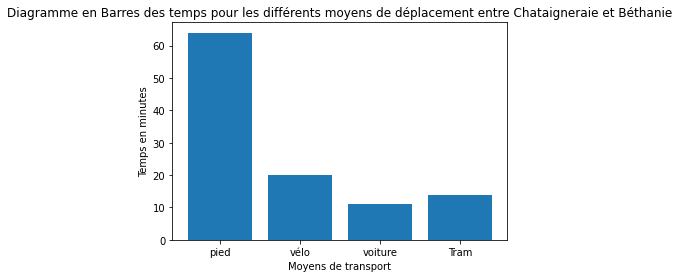

In [119]:
catégorie = ['pied','vélo','voiture','Tram']
valeur_1 = temps_arrets('Chataigneraie','Bethanie')

mp.bar(catégorie,valeur_1)
mp.xlabel('Moyens de transport')
mp.ylabel('Temps en minutes')
mp.title('Diagramme en Barres des temps pour les différents moyens de déplacement entre Chataigneraie et Béthanie')
mp.show()

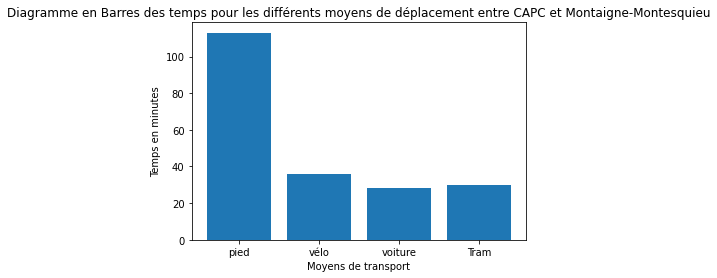

In [113]:
catégorie = ['pied','vélo','voiture','Tram']
valeur_2 = temps_arrets('CAPC','Montaigne-Montesquieu')

mp.bar(catégorie,valeur_2)
mp.xlabel('Moyens de transport')
mp.ylabel('Temps en minutes')
mp.title('Diagramme en Barres des temps pour les différents moyens de déplacement entre CAPC et Montaigne-Montesquieu')
mp.show()

In [103]:
def close_1(liste):
    somme = sum(liste)
    for j in liste :
        if j/somme > 0.5 :
            return (False)
    return (True)

In [111]:
def commentaire_6():
    print(f"On constate que le temps à pied est bien plus long qu'avec les autres moyens de transport.")
    if close_1(valeur_1[-3:]):
        print(f"Il faut quasient le même temp entre le vélo, la voiture et le tram pour se déplacer soit environ {valeur_1[2]}min.")
    else : 
        print(f"Le temp entre les moyens de transport n'est pas le même en effet le {catégorie[valeur_1.index(min(valeur_1))]} est plus rapide que les autres avec seulement {min(valeur_1)}min pour faire le trajet.")
commentaire_6()

On constate que le temps à pied est bien plus long qu'avec les autres moyens de transport.
Il faut quasient le même temp entre le vélo, la voiture et le tram pour se déplacer soit environ 11.0min.


In [114]:
def commentaire_7():
    print(f"On constate que le temps à pied est bien plus long qu'avec les autres moyens de transport.")
    if close_1(valeur_2[-3:]):
        print(f"Il faut quasient le même temp entre le vélo, la voiture et le tram pour se déplacer soit environ {valeur_2[2]}min.")
    else : 
        print(f"Le temp entre les moyens de transport n'est pas le même en effet le {catégorie[valeur_2.index(min(valeur_2))]} est plus rapide que les autres avec seulement {min(valeur_2)}min pour faire le trajet.")
commentaire_7()

On constate que le temps à pied est bien plus long qu'avec les autres moyens de transport.
Il faut quasient le même temp entre le vélo, la voiture et le tram pour se déplacer soit environ 28.0min.


In [ ]:
# 4007/4006 Chataigneraie
# 3926/3925 CAPC
# 3845/3846 Bethanie 
# 3860/3859 Victoire 
# 3871/3950 Gare saint jean 
# 3838/3837 Montaigne-Montesquieu